In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as ms

In [3]:
df = pd.read_csv("D:/Data Science & AI/regression_classification_datasets/regression_datasets/Student_Marks.csv")

In [4]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


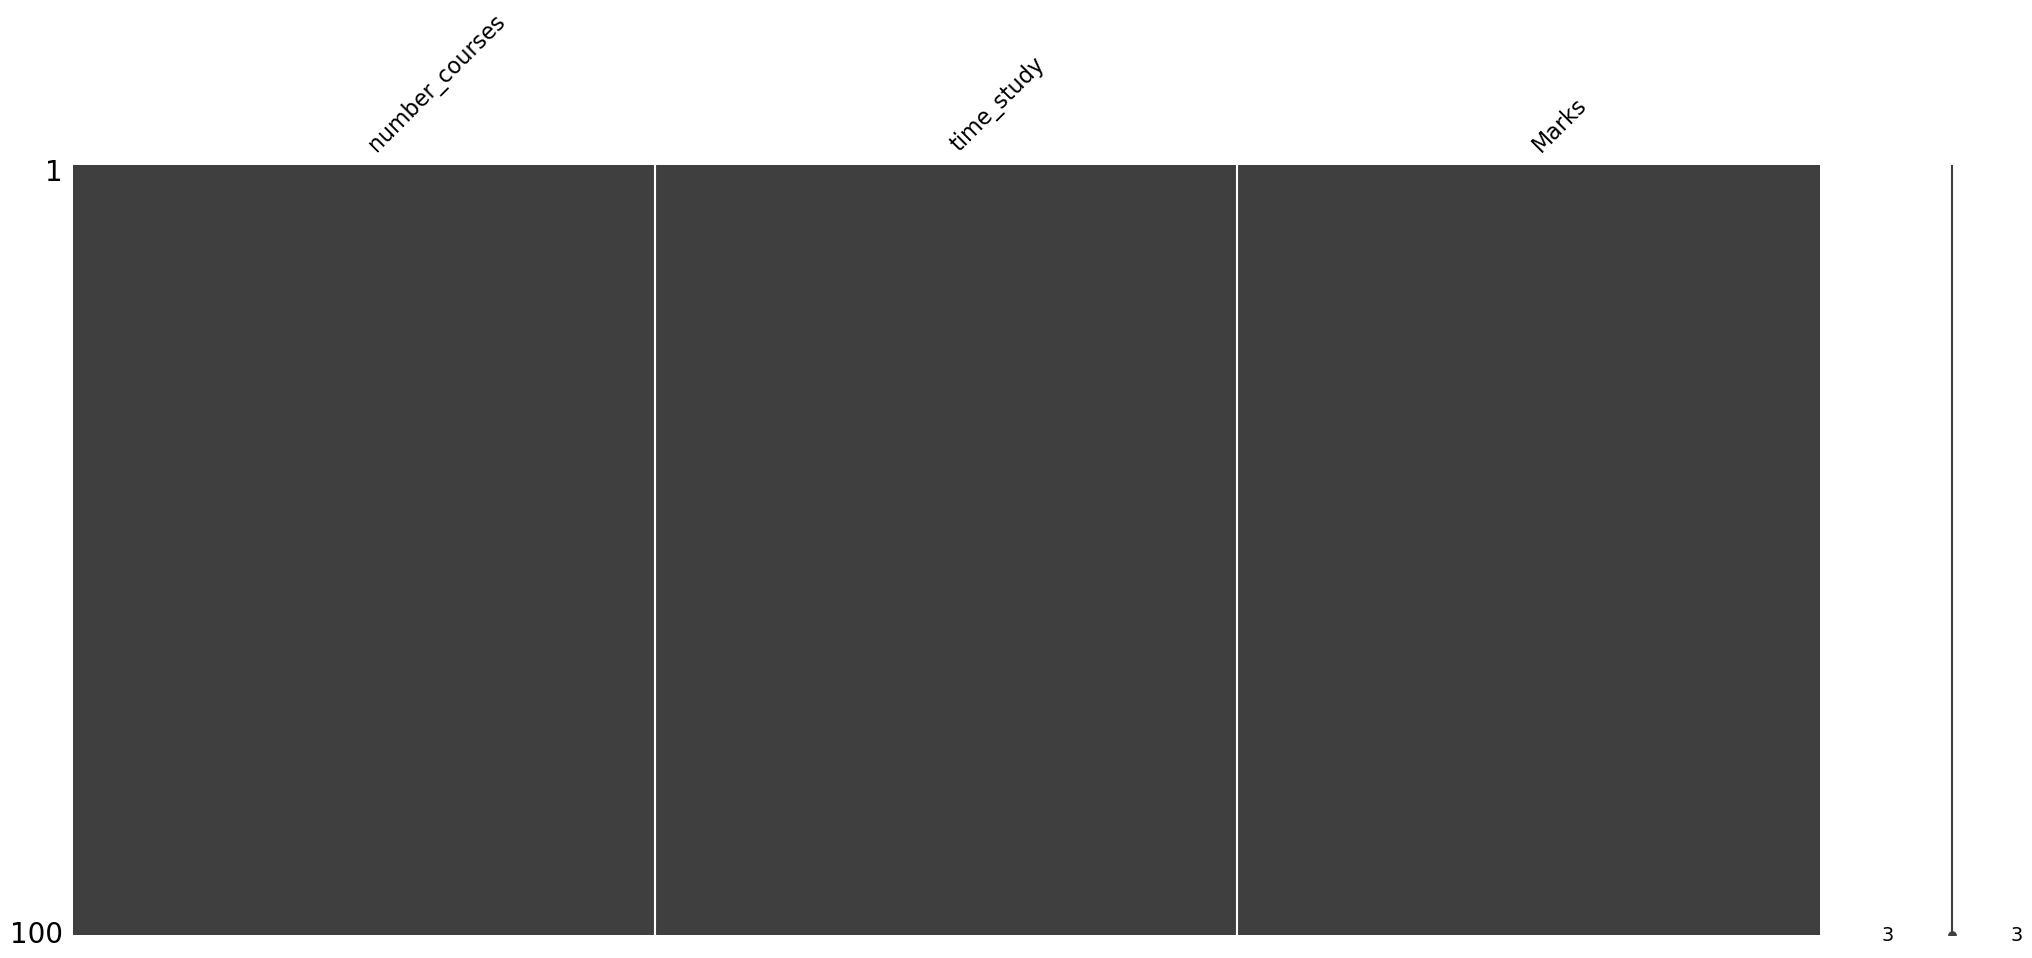

In [7]:
ms.matrix(df);

In [11]:
from yellowbrick.features import FeatureImportances
from sklearn.linear_model import LinearRegression, SGDRegressor

In [15]:
X = df.drop("Marks", axis=1)
y = df["Marks"]

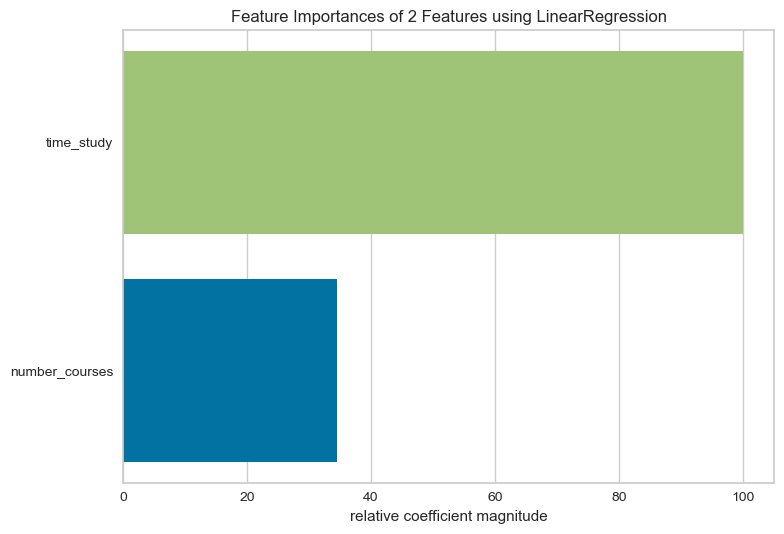

In [17]:
viz = FeatureImportances(LinearRegression())
viz.fit(X, y)
viz.show();

C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


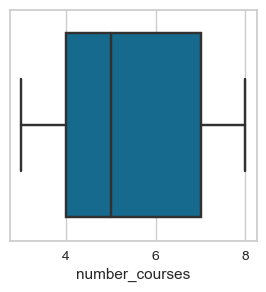

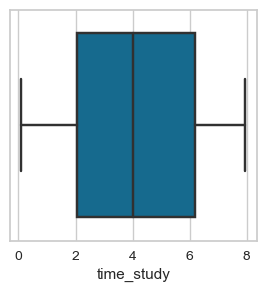

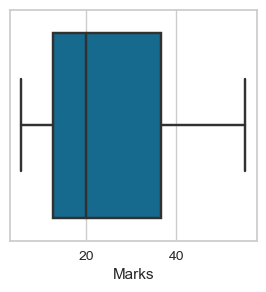

In [39]:
for i in df.columns:
    plt.figure(figsize=(7, 3));
    plt.subplot(121);
    sns.boxplot(df[i]);

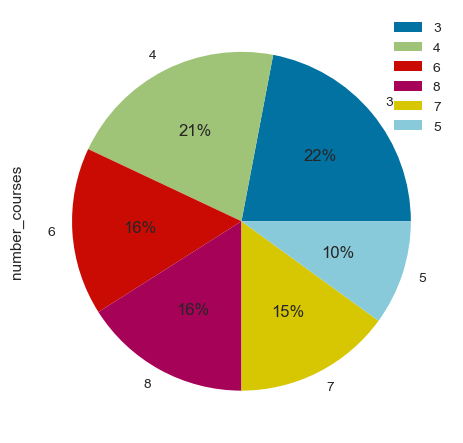

In [37]:
df["number_courses"].value_counts().plot.pie(autopct="%.0f%%").legend();

In [40]:
from yellowbrick.target import FeatureCorrelation

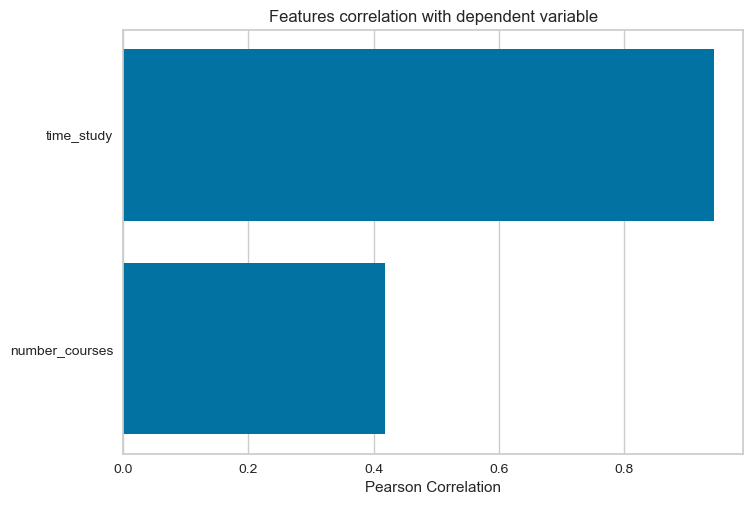

In [41]:
v = FeatureCorrelation()
v.fit(X, y)
v.show();

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 2), (80,), (20, 2), (20,))

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9379348542894724

In [47]:
from yellowbrick.regressor import PredictionError

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


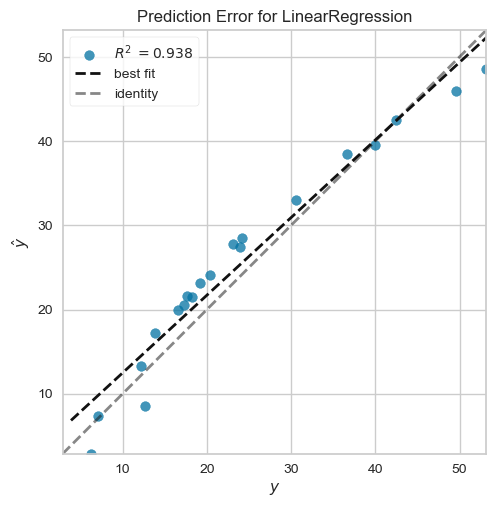

In [49]:
vz = PredictionError(model)
vz.fit(X_train, y_train)
vz.score(X_test, y_test)
vz.show();

In [ ]:
from yellowbrick.model_selection import LearningCurve

In [56]:
# sizes = np.linspace(0.3, 1.0, 10)
# lc = LearningCurve(model, cv=12, scoring='f1', train_sizes=sizes,)
# lc.fit(X, y)
# lc.show()